In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt


In [19]:
# Load the dataset
data = pd.read_csv('titanic.csv')

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# Data Preprocessing
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [22]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [23]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], prefix=['Embarked'])


In [24]:
# Step 2: Feature Engineering
# Create a new feature "FamilySize"
data['FamilySize'] = data['SibSp'] + data['Parch']

In [25]:
# Drop irrelevant columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [26]:
# Split the dataset into training and test sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 4: Select a Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
# Step 5: Train the Model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8100558659217877


In [31]:
full_data_predictions = model.predict(X)

# Add the predictions to the original dataset
data['Predicted_Survived'] = full_data_predictions

# Save the dataset with predictions to a CSV file
data.to_csv('titanic_with_predictions.csv', index=False)

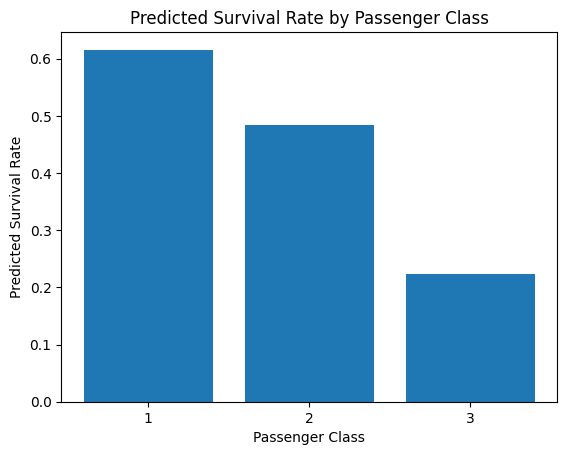

In [32]:
# Load the dataset with predictions
data = pd.read_csv('titanic_with_predictions.csv')

# Group the data by a specific feature (e.g., 'Pclass') and calculate the average survival rate for each group
grouped_data = data.groupby('Pclass')['Predicted_Survived'].mean()

# Create a bar chart to visualize the predicted survival rates for different passenger classes
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Passenger Class')
plt.ylabel('Predicted Survival Rate')
plt.title('Predicted Survival Rate by Passenger Class')
plt.xticks(grouped_data.index)
plt.show()

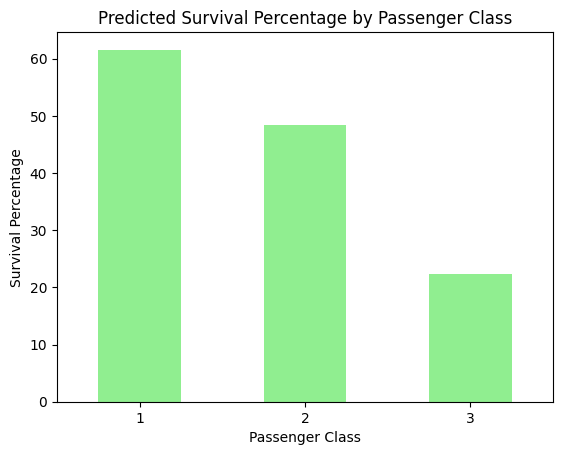

In [35]:
# Load the dataset with predictions
data = pd.read_csv('titanic_with_predictions.csv')

# Group the data by passenger class and count the number of predicted survivors and non-survivors in each class
grouped_data = data.groupby(['Pclass', 'Predicted_Survived']).size().unstack()

# Calculate the percentage of survivors and non-survivors in each class
grouped_data['Total'] = grouped_data[0] + grouped_data[1]
grouped_data['Survival Percentage'] = (grouped_data[1] / grouped_data['Total']) * 100

# Create a bar chart to visualize the percentage of predicted survivors by passenger class
grouped_data[['Survival Percentage']].plot(kind='bar', color='lightgreen', legend=False)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.title('Predicted Survival Percentage by Passenger Class')
plt.xticks(rotation=0)
plt.show()





